In [1]:
!pip install -r ../requirements.txt

In [1]:

import torch
from torch import nn
from torch import optim
from torch_lr_finder import LRFinder
from torchsummary import summary
from torch.optim.lr_scheduler import OneCycleLR


c:\Users\1430647\Anaconda3\envs\cuda\lib\site-packages\torch_lr_finder\lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import logging
import eraV2Project.loggingSetup

import logging
from eraV2Project.common import constant
logger = logging.getLogger(constant.APP_NAME).getChild(__name__)

logger.info(f"LOG file PATH: {eraV2Project.loggingSetup.get_app_log_path()}")

INFO	SCT logging configuration done
INFO	LOG file PATH: c:\Users\1430647\My\repo\github\colab-git-integration\era-v2-assignments\src\application.log


In [3]:

from eraV2Project.utility import imageVisualizationHelper ,imageAugmentationProvider
from eraV2Project.models.custom_resnet import ResNet
from eraV2Project.utility import modelHelper, trainLoopHelper, testLoopHelper
from eraV2Project.common import constant, cifar10DatasetProvider


In [4]:
DATA_FOLDER = constant.DATA_FOLDER
from torch.utils.data import Dataset
image_classes = cifar10DatasetProvider.get_image_classes()
device = modelHelper.get_device(use_seed=True)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


---->TRAINING data with transform


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

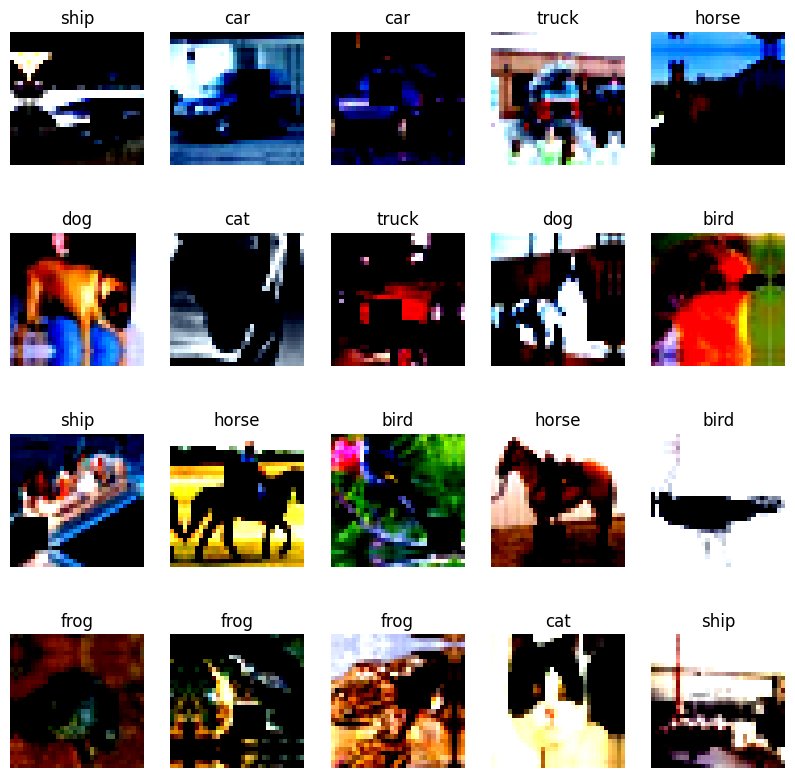

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


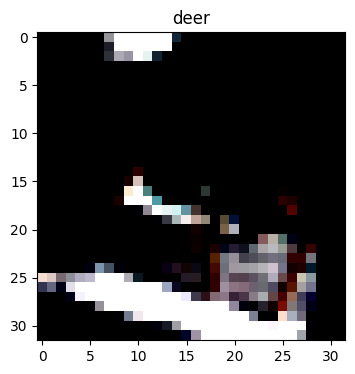

In [5]:

# Download training data from open datasets.
train_transforms_collection = []
image_mean = list(cifar10DatasetProvider.get_mean())
train_transforms_collection.extend(imageAugmentationProvider.create_random_resize_crop_transformation())
train_transforms_collection.append(imageAugmentationProvider.create_flip_transformation(is_horizontal=True))
train_transforms_collection.append(imageAugmentationProvider.create_coarse_drop_out_transformation(hole_size=(8,8), fill_value=image_mean))
train_transforms_collection.extend(imageAugmentationProvider.create_basic_transforms_collection(
                                            mean=cifar10DatasetProvider.get_mean(),
                                            std=cifar10DatasetProvider.get_std())
                                )

train_transforms = imageAugmentationProvider.compose_custom_transforms(train_transforms_collection)
test_transforms = imageAugmentationProvider.compose_custom_transforms(imageAugmentationProvider.create_basic_transforms_collection())

train_dataset, test_dataset = cifar10DatasetProvider.get_CIFAR10_datasets(train_transforms_collection=train_transforms,
                                                                   test_transforms_collection=test_transforms,
                                                                    data_folder=DATA_FOLDER)

print("---->TRAINING data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(train_dataset, image_classes, rows=4, cols=5)


# print("---->TEST data with transform")
# imageVisualizationHelper.randomly_show_images_from_tensor_array(test_dataset, image_classes, rows=4, cols=4)

# Show single image
sample_idx = torch.randint(0, len(test_dataset), size=(1,))  
image_data, label = test_dataset[sample_idx.item()]
imageVisualizationHelper.show_image(image_data, image_classes[label])


In [6]:

BATCH_SIZE = 512
train_dataloader, test_dataloader = cifar10DatasetProvider.get_dataloaders(train_dataset=train_dataset,
                                                                    test_dataset=test_dataset,
                                                                    batch_size=BATCH_SIZE)
                                                                    


INFO	Shape of test_dataloader batch_data [Batch, C, H, W]: torch.Size([512, 3, 32, 32])
INFO	Shape of test_dataloader label (label): torch.Size([512]) torch.int64


In [7]:
def get_model_instance(index=1, input_size=(3,32,32)) -> nn.Module:
    if(index <= 1 ):
        model = ResNet().to(device=device)
        summary(model=model, input_size=input_size)
        return model


model = get_model_instance(index=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,728
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 32, 32]          73,728
      BatchNorm2d-10          [-1, 128, 32, 32]             256
             ReLU-11          [-1, 128, 32, 32]               0
          Dropout-12          [-1, 128, 32, 32]               0
           Conv2d-13          [-1, 128, 32, 32]         147,456
      BatchNorm2d-14          [-1, 128,

In [8]:
MAX_IMAGES_FOR_DISPLAY = 20

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []

train_accuracy = []
test_accuracy = []

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []

correctly_predicted_test_images = []
wrongly_predicted_test_images = []

In [9]:

def train_loop(dataloader, model, loss_fn, optimizer : optim.Optimizer):
    batch_train_accuracy, batch_train_losses, correctly_predicted_images, wrongly_predicted_images = trainLoopHelper.train_loop(dataloader, model, loss_fn, optimizer)
    train_accuracy.append(batch_train_accuracy)
    train_losses.append(batch_train_losses)

    if(len(correctly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        correctly_predicted_trained_images.extend(correctly_predicted_images)

    if(len(wrongly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        wrongly_predicted_trained_images.extend(wrongly_predicted_images)


In [10]:
def test_loop(dataloader, model, loss_fn):

        batch_test_accuracy, batch_test_losses, correctly_predicted_images, wrongly_predicted_images = testLoopHelper.test_loop(dataloader, model, loss_fn)
        test_accuracy.append(batch_test_accuracy)
        test_losses.append(batch_test_losses)

        if(len(correctly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            correctly_predicted_test_images.extend(correctly_predicted_images)

        if(len(wrongly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            wrongly_predicted_test_images.extend(wrongly_predicted_images)


  0%|          | 0/250 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 7.03E-02


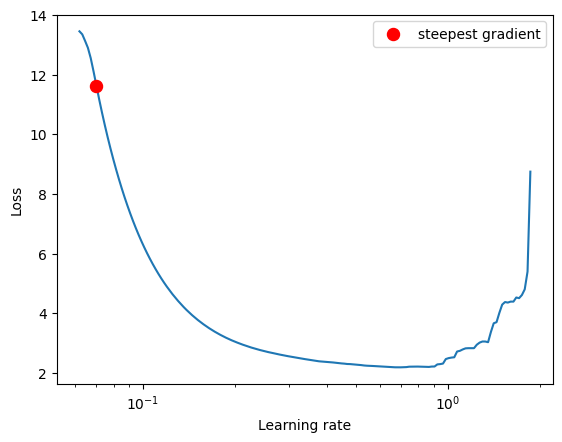

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05, weight_decay=1e-4)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_dataloader, end_lr=10, num_iter=250, step_mode="exp")

lr_finder.plot()
lr_finder.reset()

In [12]:
EPOCHS = 24

# LEARNING_RATE = 0.01
# MOMENTUM = 0.85

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []
correctly_predicted_test_images = []
wrongly_predicted_test_images = []

scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=7.03E-02,
                                                pct_start = 5/EPOCHS,
                                                div_factor=100,
                                                final_div_factor=1000,
                                                anneal_strategy = "linear",
                                                steps_per_epoch=len(train_dataloader),
                                                epochs=EPOCHS)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=0)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8, verbose=True)


for t in range(EPOCHS):
    print(f"Epoch {t+1}")
    train_loop(train_dataloader, model, criterion, optimizer)
    test_loop(test_dataloader, model, criterion)
    scheduler.step()

print("Done!")

Epoch 1


Train: Loss=1.1273 Batch_id=97 Accuracy=49.62: 100%|██████████| 98/98 [00:50<00:00,  1.93it/s]
INFO	Test set: Average loss: 20.8177, Accuracy: 6370/10000 (63.70%)



Epoch 2


Train: Loss=0.9470 Batch_id=97 Accuracy=67.35: 100%|██████████| 98/98 [00:50<00:00,  1.94it/s]
INFO	Test set: Average loss: 16.0303, Accuracy: 7220/10000 (72.20%)



Epoch 3


Train: Loss=0.6502 Batch_id=97 Accuracy=75.01: 100%|██████████| 98/98 [00:51<00:00,  1.90it/s]
INFO	Test set: Average loss: 13.3740, Accuracy: 7614/10000 (76.14%)



Epoch 4


Train: Loss=0.5482 Batch_id=97 Accuracy=78.94: 100%|██████████| 98/98 [00:50<00:00,  1.93it/s]
INFO	Test set: Average loss: 14.1206, Accuracy: 7547/10000 (75.47%)



Epoch 5


Train: Loss=0.5136 Batch_id=97 Accuracy=81.93: 100%|██████████| 98/98 [00:53<00:00,  1.82it/s]
INFO	Test set: Average loss: 11.3311, Accuracy: 8031/10000 (80.31%)



Epoch 6


Train: Loss=0.5133 Batch_id=97 Accuracy=83.50: 100%|██████████| 98/98 [00:54<00:00,  1.80it/s]
INFO	Test set: Average loss: 9.9128, Accuracy: 8340/10000 (83.40%)



Epoch 7


Train: Loss=0.4027 Batch_id=97 Accuracy=85.10: 100%|██████████| 98/98 [00:54<00:00,  1.79it/s]
INFO	Test set: Average loss: 9.5515, Accuracy: 8353/10000 (83.53%)



Epoch 8


Train: Loss=0.4024 Batch_id=97 Accuracy=85.90: 100%|██████████| 98/98 [00:51<00:00,  1.91it/s]
INFO	Test set: Average loss: 9.7519, Accuracy: 8371/10000 (83.71%)



Epoch 9


Train: Loss=0.3688 Batch_id=97 Accuracy=87.50: 100%|██████████| 98/98 [00:52<00:00,  1.88it/s]
INFO	Test set: Average loss: 9.0151, Accuracy: 8483/10000 (84.83%)



Epoch 10


Train: Loss=0.4251 Batch_id=97 Accuracy=87.74: 100%|██████████| 98/98 [00:51<00:00,  1.91it/s]
INFO	Test set: Average loss: 9.5455, Accuracy: 8410/10000 (84.10%)



Epoch 11


Train: Loss=0.3189 Batch_id=97 Accuracy=88.36: 100%|██████████| 98/98 [00:48<00:00,  2.03it/s]
INFO	Test set: Average loss: 8.6874, Accuracy: 8514/10000 (85.14%)



Epoch 12


Train: Loss=0.2396 Batch_id=97 Accuracy=88.86: 100%|██████████| 98/98 [00:48<00:00,  2.04it/s]
INFO	Test set: Average loss: 8.2656, Accuracy: 8655/10000 (86.55%)



Epoch 13


Train: Loss=0.3380 Batch_id=97 Accuracy=89.73: 100%|██████████| 98/98 [00:48<00:00,  2.02it/s]
INFO	Test set: Average loss: 8.2456, Accuracy: 8672/10000 (86.72%)



Epoch 14


Train: Loss=0.3032 Batch_id=97 Accuracy=89.43: 100%|██████████| 98/98 [00:48<00:00,  2.02it/s]
INFO	Test set: Average loss: 7.5854, Accuracy: 8728/10000 (87.28%)



Epoch 15


Train: Loss=0.3311 Batch_id=97 Accuracy=89.64: 100%|██████████| 98/98 [00:52<00:00,  1.88it/s]
INFO	Test set: Average loss: 8.5625, Accuracy: 8572/10000 (85.72%)



Epoch 16


Train: Loss=0.2981 Batch_id=97 Accuracy=89.68: 100%|██████████| 98/98 [00:50<00:00,  1.92it/s]
INFO	Test set: Average loss: 10.0319, Accuracy: 8377/10000 (83.77%)



Epoch 17


Train: Loss=0.3375 Batch_id=97 Accuracy=89.90: 100%|██████████| 98/98 [00:51<00:00,  1.91it/s]
INFO	Test set: Average loss: 7.9213, Accuracy: 8692/10000 (86.92%)



Epoch 18


Train: Loss=0.3383 Batch_id=97 Accuracy=89.98: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s]
INFO	Test set: Average loss: 8.8832, Accuracy: 8517/10000 (85.17%)



Epoch 19


Train: Loss=0.2860 Batch_id=97 Accuracy=89.89: 100%|██████████| 98/98 [00:49<00:00,  1.97it/s]
INFO	Test set: Average loss: 7.5620, Accuracy: 8800/10000 (88.00%)



Epoch 20


Train: Loss=0.3229 Batch_id=97 Accuracy=90.41: 100%|██████████| 98/98 [00:51<00:00,  1.91it/s]
INFO	Test set: Average loss: 8.5620, Accuracy: 8630/10000 (86.30%)



Epoch 21


Train: Loss=0.2924 Batch_id=97 Accuracy=90.82: 100%|██████████| 98/98 [00:51<00:00,  1.92it/s]
INFO	Test set: Average loss: 9.2152, Accuracy: 8494/10000 (84.94%)



Epoch 22


Train: Loss=0.2675 Batch_id=97 Accuracy=90.35: 100%|██████████| 98/98 [00:51<00:00,  1.89it/s]
INFO	Test set: Average loss: 8.9345, Accuracy: 8595/10000 (85.95%)



Epoch 23


Train: Loss=0.3902 Batch_id=97 Accuracy=89.69: 100%|██████████| 98/98 [00:52<00:00,  1.85it/s]
INFO	Test set: Average loss: 9.4233, Accuracy: 8532/10000 (85.32%)



Epoch 24


Train: Loss=0.3273 Batch_id=97 Accuracy=90.19: 100%|██████████| 98/98 [00:53<00:00,  1.83it/s]
INFO	Test set: Average loss: 9.2086, Accuracy: 8559/10000 (85.59%)



Done!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


----****----Wrongly predicted test images: 20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


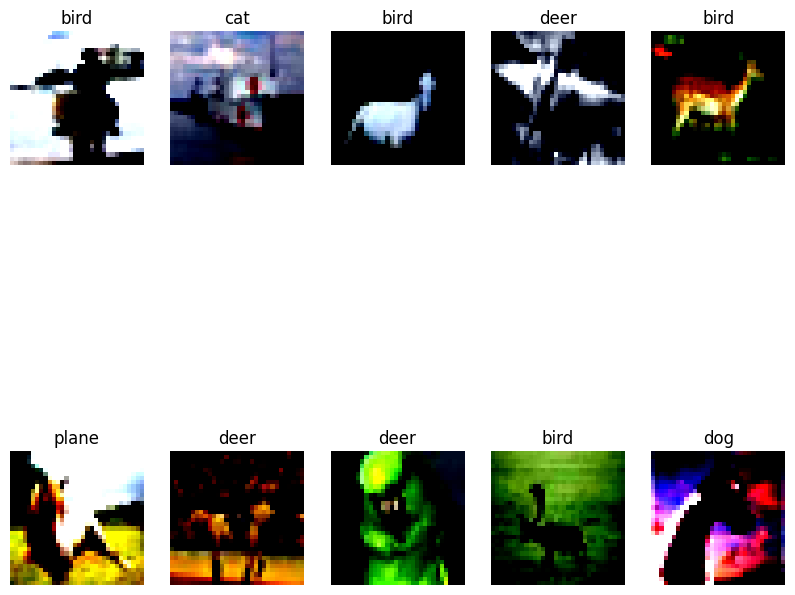

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

----****----Correctly predicted test images: 20


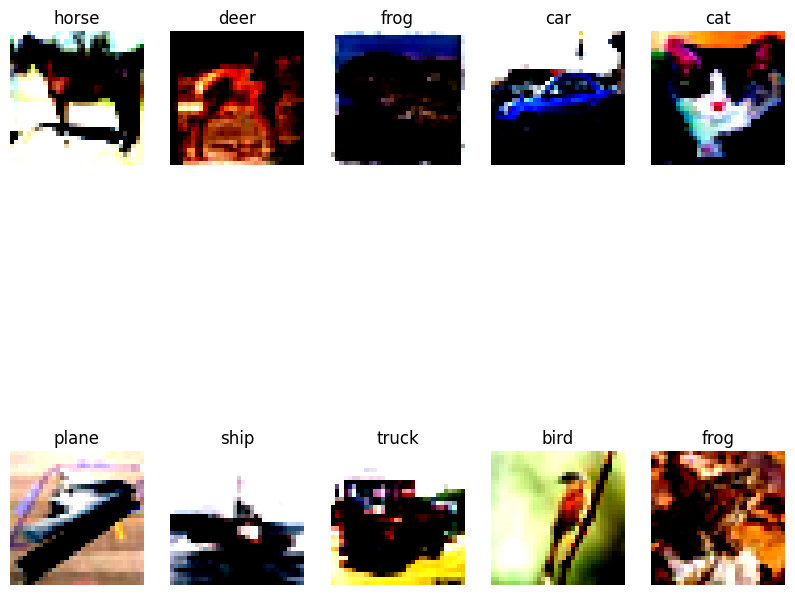

In [13]:

print(f"----****----Wrongly predicted test images: {len(wrongly_predicted_test_images)}")
imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_test_images, image_classes, rows=2, cols=5)

print(f"----****----Correctly predicted test images: {len(correctly_predicted_test_images)}")
imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_test_images, image_classes, rows=2, cols=5)


# print(f"----****----Wrongly predicted train images: {len(wrongly_predicted_trained_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_trained_images, image_classes, rows=2, cols=5)

# print(f"----****----Correctly predicted train images: {len(correctly_predicted_trained_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_trained_images, image_classes, rows=2, cols=5)
